# Crash Trends Analysis
This analysis investigates crash trends using a dataset that captures details like time, location, vehicle involvement, and demographics.

## Step 1: Load and Inspect the Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/ardd_fatalities.csv'
data = pd.read_csv(file_path)

# Display basic information
data_info = {
    "Shape": data.shape,
    "Columns": data.columns.tolist(),
    "Missing Values": data.isnull().sum(),
    "Sample Data": data.head()
}

data_info

<ipython-input-1-525eeb80293c>:6: DtypeWarning: Columns (10,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


{'Shape': (55360, 24),
 'Columns': ['Crash ID',
  'State',
  'Month',
  'Year',
  'Dayweek',
  'Time',
  'Crash Type',
  'Bus Involvement',
  'Heavy Rigid Truck Involvement',
  'Articulated Truck Involvement',
  'Speed Limit',
  'Road User',
  'Gender',
  'Age',
  'National Remoteness Areas',
  'SA4 Name 2021',
  'National LGA Name 2021',
  'National Road Type',
  'Christmas Period',
  'Easter Period',
  'Age Group',
  'Day of week',
  'Time of day',
  'Unnamed: 23'],
 'Missing Values': Crash ID                             0
 State                                0
 Month                                0
 Year                                 0
 Dayweek                              0
 Time                                53
 Crash Type                           5
 Bus Involvement                      4
 Heavy Rigid Truck Involvement        4
 Articulated Truck Involvement        4
 Speed Limit                          0
 Road User                            0
 Gender                      

## Step 2: Clean the Dataset
1. Drop irrelevant columns.
2. Handle missing values where less than 5% are missing.
3. Convert columns to appropriate data types.

In [2]:
# Drop columns with excessive missing data
columns_to_drop = ['National Remoteness Areas', 'SA4 Name 2021', 'National LGA Name 2021', 'National Road Type', 'Unnamed: 23']
cleaned_data = data.drop(columns=columns_to_drop)

# Handle missing values for 'Time' and 'Crash Type'
cleaned_data = cleaned_data.dropna(subset=['Time', 'Crash Type'])

# Convert columns to numeric where applicable
cleaned_data['Year'] = pd.to_numeric(cleaned_data['Year'], errors='coerce')
cleaned_data['Age'] = pd.to_numeric(cleaned_data['Age'], errors='coerce')

cleaned_data.reset_index(drop=True, inplace=True)
cleaned_data.head()

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,Speed Limit,Road User,Gender,Age,Christmas Period,Easter Period,Age Group,Day of week,Time of day
0,20234009,SA,10,2023,Saturday,03:00,Single,No,No,No,100,Driver,Male,22,No,No,17_to_25,Weekend,Night
1,20233087,Qld,10,2023,Saturday,03:00,Single,No,No,No,80,Driver,Male,19,No,No,17_to_25,Weekend,Night
2,20233149,Qld,10,2023,Sunday,03:00,Single,No,No,No,60,Passenger,Male,37,No,No,26_to_39,Weekend,Night
3,20233190,Qld,10,2023,Sunday,03:00,Multiple,No,No,No,100,Motorcycle rider,Male,35,No,No,26_to_39,Weekend,Night
4,20233052,Qld,10,2023,Saturday,23:00,Single,No,No,No,70,Driver,Female,32,No,No,26_to_39,Weekend,Night


## Step 3: Analyze Crash Trends by Year and Month

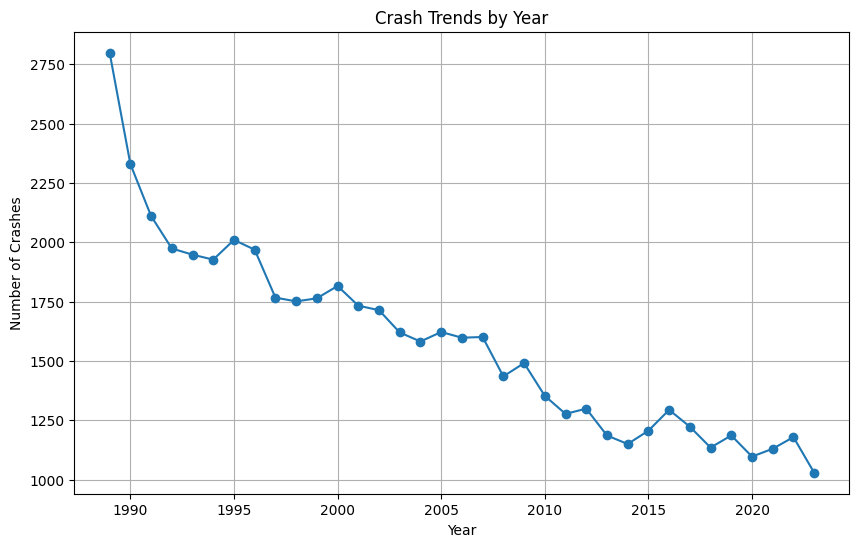

In [15]:
# Analyze crash trends by year and month
crashes_by_year = cleaned_data['Year'].value_counts().sort_index()
crashes_by_month = cleaned_data['Month'].value_counts().sort_index()

# Plot crashes by year
plt.figure(figsize=(10, 6))
plt.plot(crashes_by_year.index, crashes_by_year.values, marker='o')
plt.title('Crash Trends by Year')
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.grid(True)
plt.show()



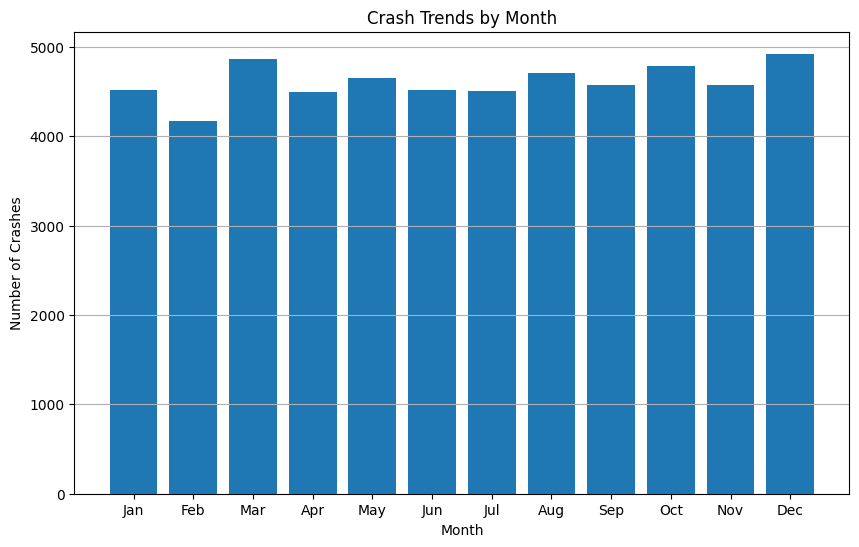

In [16]:
# Plot crashes by month with names
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.figure(figsize=(10, 6))
plt.bar(crashes_by_month.index, crashes_by_month.values, tick_label=month_names)
plt.title('Crash Trends by Month')
plt.xlabel('Month')
plt.ylabel('Number of Crashes')
plt.grid(axis='y')
plt.show()

## Step 4: Crash Trends by Day of the Week

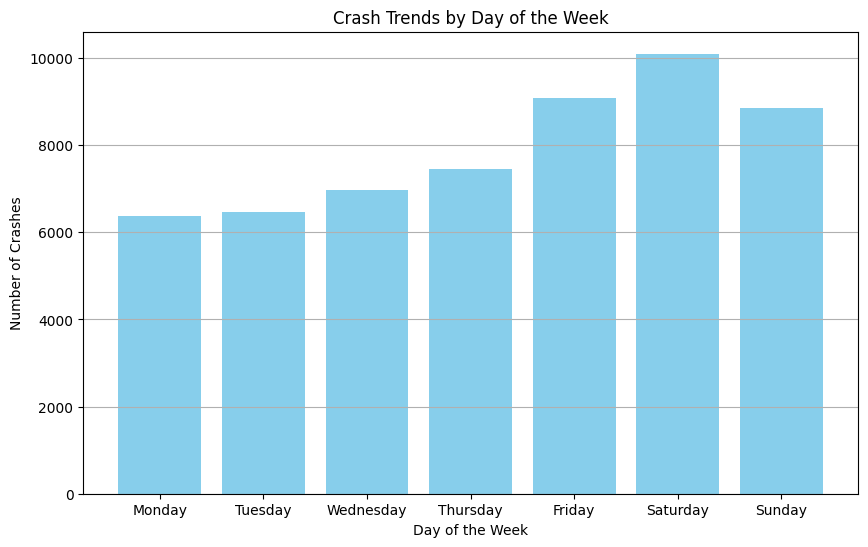

In [4]:
# Analyze crash trends by day of the week
crashes_by_day = cleaned_data['Dayweek'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

# Plot crashes by day of the week
plt.figure(figsize=(10, 6))
plt.bar(crashes_by_day.index, crashes_by_day.values, color='skyblue')
plt.title('Crash Trends by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crashes')
plt.grid(axis='y')
plt.show()

## Step 5: Crash Trends by Road User

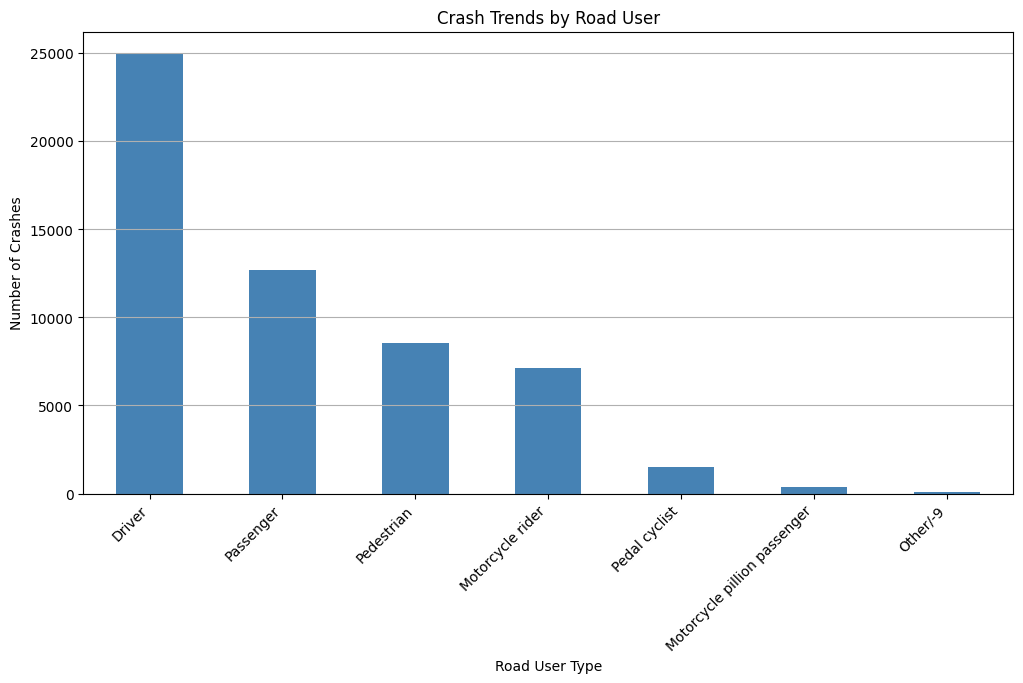

In [6]:
# Analyze crash trends by road user
crashes_by_road_user = cleaned_data['Road User'].value_counts()

# Plot crashes by road user
plt.figure(figsize=(12, 6))
crashes_by_road_user.plot(kind='bar', color='steelblue')
plt.title('Crash Trends by Road User')
plt.xlabel('Road User Type')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

## Step 6: Crash Trends by Season

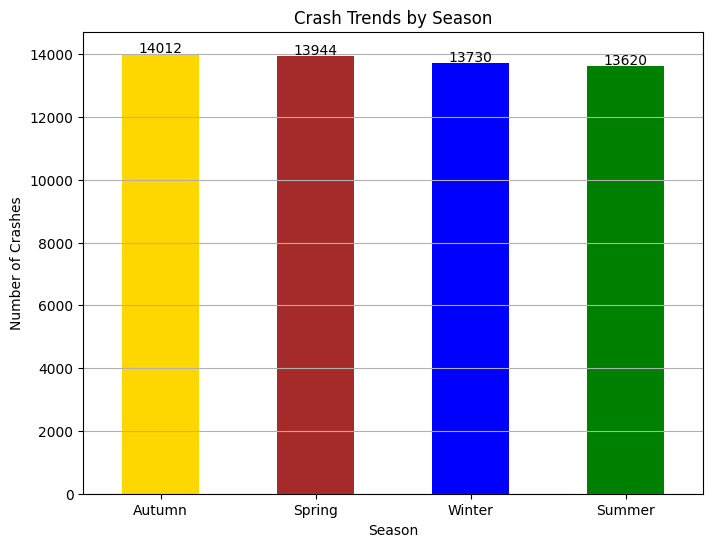

In [7]:
# Assign seasons based on the 'Month' column
def assign_season(month):
    if month in [12, 1, 2]:
        return 'Summer'
    elif month in [3, 4, 5]:
        return 'Autumn'
    elif month in [6, 7, 8]:
        return 'Winter'
    else:  # 9, 10, 11
        return 'Spring'

cleaned_data['Season'] = cleaned_data['Month'].apply(assign_season)

# Analyze crash trends by season
crashes_by_season = cleaned_data['Season'].value_counts()

# Plot crash trends by season with numbers
plt.figure(figsize=(8, 6))
bars = crashes_by_season.plot(kind='bar', color=['gold', 'brown', 'blue', 'green'])
for index, value in enumerate(crashes_by_season):
    plt.text(index, value + 50, str(value), ha='center', fontsize=10)

plt.title('Crash Trends by Season')
plt.xlabel('Season')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

## Step 7: Crash trends by speed limit

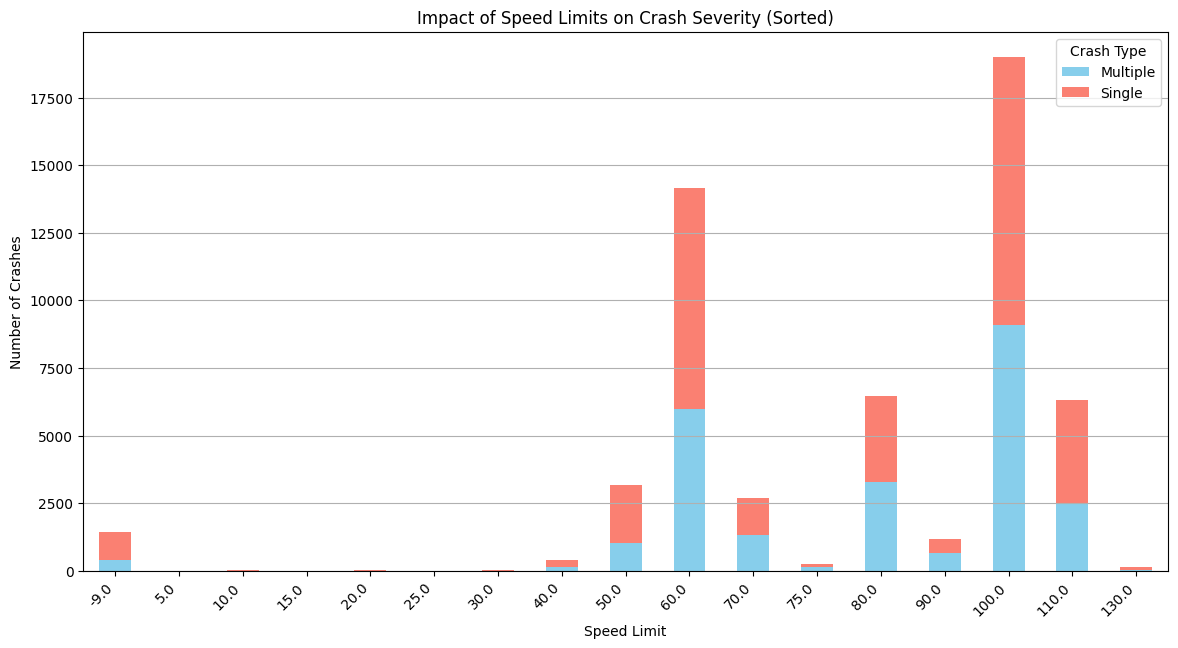

In [9]:

# Convert the speed limits to numeric values, forcing errors to NaN for invalid entries
cleaned_data['Speed Limit'] = pd.to_numeric(cleaned_data['Speed Limit'], errors='coerce')

# Recalculate the speed severity grouping after conversion
speed_severity_corrected = cleaned_data.groupby(['Speed Limit', 'Crash Type']).size().unstack()

# Sort the speed limits for better visualization
speed_severity_sorted = speed_severity_corrected.sort_index()

# Plot the sorted impact of speed limits on crash severity
speed_severity_sorted.plot(kind='bar', figsize=(14, 7), stacked=True, color=['skyblue', 'salmon'])
plt.title('Impact of Speed Limits on Crash Severity (Sorted)')
plt.xlabel('Speed Limit')
plt.ylabel('Number of Crashes')
plt.legend(title='Crash Type', loc='upper right')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

## Step 8: Accidents during Hoidays vs Non Holidays

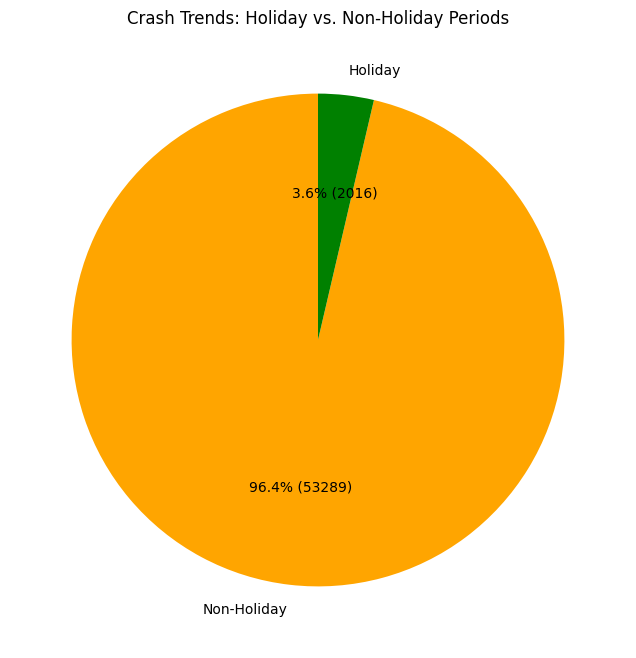

In [12]:
# Create a new column to differentiate between holiday and non-holiday periods
cleaned_data['Holiday Period'] = cleaned_data[['Christmas Period', 'Easter Period']].apply(
    lambda x: 'Holiday' if 'Yes' in x.values else 'Non-Holiday', axis=1
)

# Count crashes during holiday and non-holiday periods
crashes_holiday_vs_non = cleaned_data['Holiday Period'].value_counts()

# Plot crash trends during holiday vs. non-holiday periods as a pie chart
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
crashes_holiday_vs_non.plot(
    kind='pie',
    autopct=lambda p: f'{p:.1f}% ({int(p * crashes_holiday_vs_non.sum() / 100)})',
    colors=['orange', 'green'],
    startangle=90
)
plt.title('Crash Trends: Holiday vs. Non-Holiday Periods')
plt.ylabel('')  # Remove y-axis label for better aesthetics
plt.show()


## Step 9: Large Vehicle Involvement

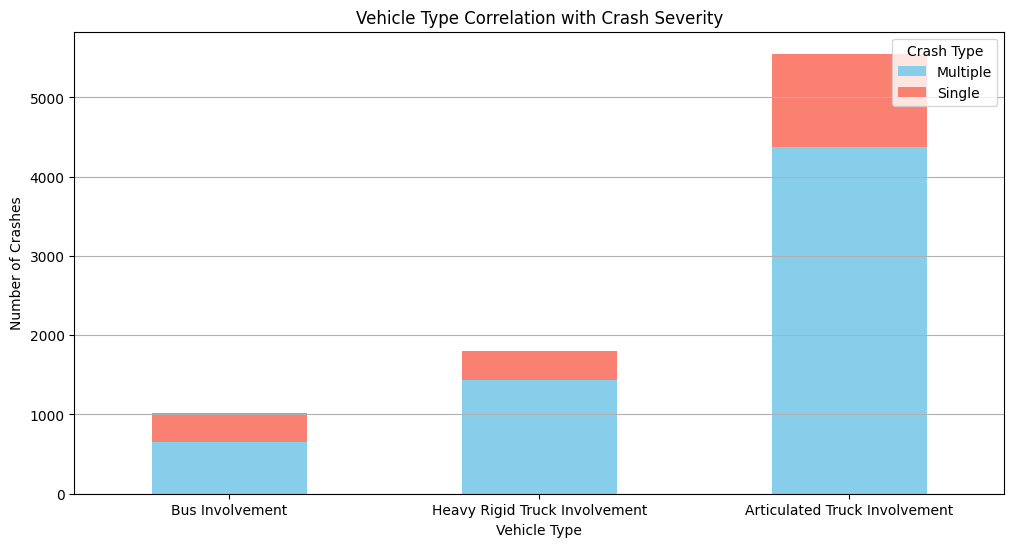

In [14]:
# Analyze the correlation between vehicle type involvement and crash severity
vehicle_severity = cleaned_data.groupby(['Crash Type'])[
    ['Bus Involvement', 'Heavy Rigid Truck Involvement', 'Articulated Truck Involvement']
].apply(lambda x: x.apply(lambda y: (y == 'Yes').sum()))

# Plot the correlation
vehicle_severity.T.plot(kind='bar', figsize=(12, 6), stacked=True, color=['skyblue', 'salmon'])
plt.title('Vehicle Type Correlation with Crash Severity')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Crashes')
plt.legend(title='Crash Type', loc='upper right')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


## Step 10: Single vs Multiple

Crashes for age group 18-25:
Crash Type
Single      7789
Multiple    5021
Name: count, dtype: int64


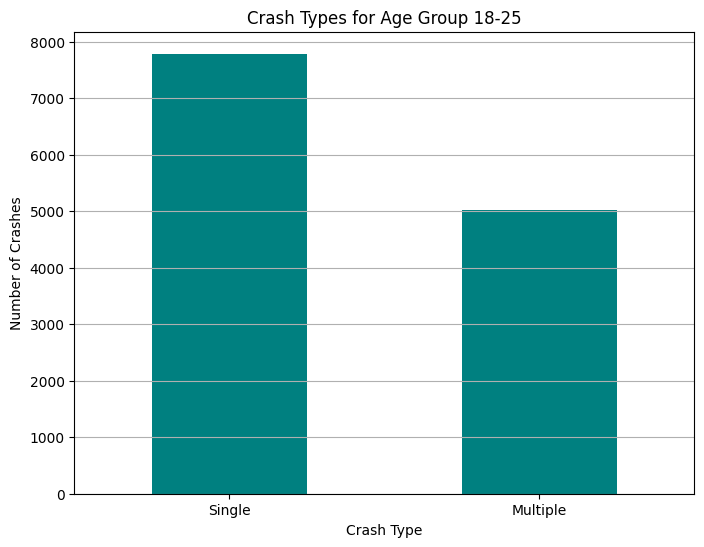

In [19]:
# Remove unspecified or invalid ages (e.g., 0 or NaN)
filtered_age_data = cleaned_data[(cleaned_data['Age'].notna()) & (cleaned_data['Age'] > 0)]

# Filter crashes for a specific age range (e.g., 18 to 25 years)
age_filtered_data = filtered_age_data[(filtered_age_data['Age'] >= 18) & (filtered_age_data['Age'] <= 25)]

# Analyze the filtered data
age_filtered_crashes = age_filtered_data['Crash Type'].value_counts()

# Display the filtered data and crash counts
print("Crashes for age group 18-25:")
print(age_filtered_crashes)

# Plot crash types for the filtered age group
plt.figure(figsize=(8, 6))
age_filtered_crashes.plot(kind='bar', color='teal')
plt.title('Crash Types for Age Group 18-25')
plt.xlabel('Crash Type')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()



## Step 11: Male vs Female

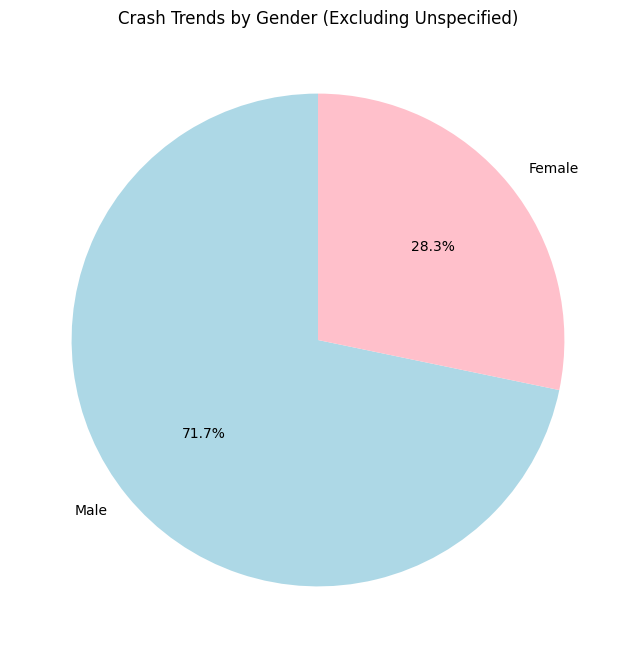

In [20]:
# Filter out 'Unspecified' or invalid entries from the Gender column
filtered_gender_data = cleaned_data[cleaned_data['Gender'].isin(['Male', 'Female'])]

# Analyze crash trends by gender
crashes_by_gender = filtered_gender_data['Gender'].value_counts()

# Plot crash trends by gender as a pie chart
plt.figure(figsize=(8, 8))
crashes_by_gender.plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=['lightblue', 'pink'],
    startangle=90
)
plt.title('Crash Trends by Gender (Excluding Unspecified)')
plt.ylabel('')  # Remove y-axis label for better aesthetics
plt.show()


## Step 12: Crash severety by age group

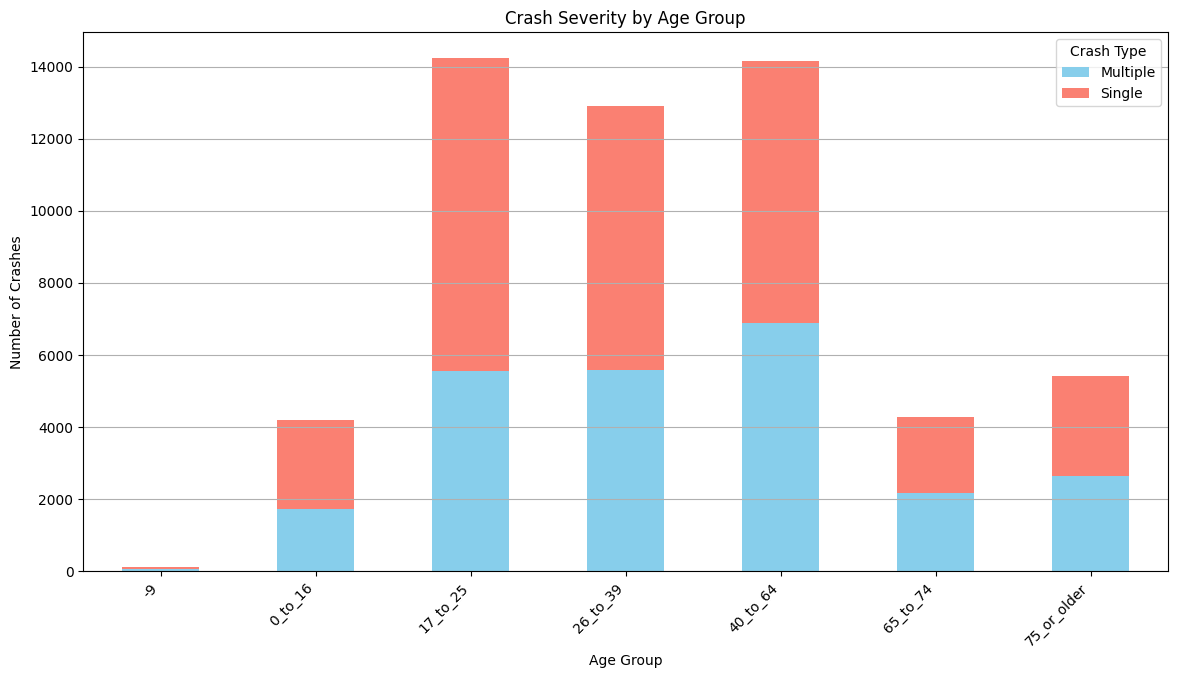

In [21]:
# Compare crash severity by age group using 'Crash Type' as a proxy
severity_by_age_group = cleaned_data.groupby(['Age Group', 'Crash Type']).size().unstack()

# Plot crash severity by age group
severity_by_age_group.plot(kind='bar', figsize=(14, 7), stacked=True, color=['skyblue', 'salmon'])
plt.title('Crash Severity by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Crash Type', loc='upper right')
plt.grid(axis='y')
plt.show()